# TODO: Dog Breed Image Classification

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug
# !pip install sagemaker

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2021-12-03 05:46:19--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.240
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  41.1MB/s    in 31s     

2021-12-03 05:46:52 (35.0 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [ ]:
!unzip dogImages.zip

In [4]:
import sagemaker
import boto3


bucket = 'sagemaker-studio-mb7oqzoi7lj' ## TODO: fill in
print("Default Bucket: {}".format(bucket))

region = boto3.Session().region_name ## TODO: fill in
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role() ## TODO: fill in
print("RoleArn: {}".format(role))

Default Bucket: sagemaker-studio-mb7oqzoi7lj
AWS Region: us-east-1
RoleArn: arn:aws:iam::015775941522:role/service-role/AmazonSageMaker-ExecutionRole-20211202T085370


In [5]:
import os

sagemaker_session = sagemaker.Session()

# bucket = sagemaker_session.default_bucket()
prefix = "dogImages"

role = sagemaker.get_execution_role()
print("input spec (in this case, just an S3 path): {}".format(inputs))

In [6]:
!pygmentize train_model.py

#TODO: Import your dependencies.
#For instance, below are some dependencies you might need if you are using Pytorch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
# import smdebug.pytorch as smd
# from smdebug import modes
# from smdebug.profiler.utils import str2bool
# from smdebug.pytorch import get_hook
import os
import io
import sys
# import boto3
from PIL import ImageFile

import argparse

ImageFile.LOAD_TRUNCATED_IMAGES = True

def test(model, test_loader, criterion, hook):
    '''
    TODO: Complete this function that can take a model and a 
          testing data loader and will get the test accuray/loss of the model
          Remember to include any debugging/profiling hooks that you might need
    '''
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.eval()
    running_loss=0
    running_corrects=0
#     hook

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

role = sagemaker.get_execution_role()

In [8]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001,0.01),
#     "epochs": IntegerParameter(2, 16),
    "batch-size": CategoricalParameter([16, 32, 64]),
}
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [9]:
from sagemaker.pytorch import PyTorch

In [9]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=5,
    instance_type="ml.m5.large"
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=10,
    max_parallel_jobs=5,
    objective_type=objective_type,
)


In [10]:
s3_bucket_uri = f's3://sagemaker-studio-mb7oqzoi7lj/dogImages'
input_paths = {
    'train': s3_bucket_uri+'/train',       
    'test': s3_bucket_uri+'/test',      
    'val': s3_bucket_uri+'/valid'
}
_job_name = "DogImage-Breed-Classification-5"

In [10]:
# TODO: Fit your HP Tuner\
tuner.fit(inputs=input_paths,job_name=_job_name, wait=True) # TODO: Remember to include your data channelsjob_name=

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [11]:
tuner = HyperparameterTuner.attach(_job_name)

In [12]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator() #TODO

#Get the hyperparameters of the best trained model
bh = best_estimator.hyperparameters()


2021-12-15 11:45:52 Starting - Preparing the instances for training
2021-12-15 11:45:52 Downloading - Downloading input data
2021-12-15 11:45:52 Training - Training image download completed. Training in progress.
2021-12-15 11:45:52 Uploading - Uploading generated training model
2021-12-15 11:45:52 Completed - Training job completed


In [13]:
bh

{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"64"',
 'lr': '0.001295621162883104',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"DogImage-Breed-Classification-5"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-015775941522/DogImage-Breed-Classification-5/source/sourcedir.tar.gz"'}

In [14]:
import re
batch_size = int(re.search(r'\d+', bh['batch-size']).group())
lr = float(bh['lr'])
print((batch_size, lr))

(64, 0.001295621162883104)


## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [15]:
# TODO: Create and fit an estimator
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    CollectionConfig,
    rule_configs,
)
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import ProfilerConfig, FrameworkProfile
rules = [
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    Rule.sagemaker(rule_configs.loss_not_decreasing(), rule_parameters={ "tensor_regex": "CrossEntropyLoss_output_0", "mode": "TRAIN"})
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

collection_configs=[
    CollectionConfig(
                name="CrossEntropyLoss_output_0",
                parameters={
                        "include_regex": "CrossEntropyLoss_output_0", 
                        "train.save_interval": "100",
                        "eval.save_interval": "10"
                }
    )
]
hook_config = DebuggerHookConfig(
    collection_configs=collection_configs
)
hyperparameters = {"batch-size": batch_size, "lr": lr}

In [43]:
estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="smdebugger-dogimage-breed-classification",
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    ## Debugger and Profiler parameters
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config,
)
estimator.fit(inputs= input_paths ,wait=True)

2021-12-20 07:15:26 Starting - Starting the training job...
2021-12-20 07:15:29 Starting - Launching requested ML instancesVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LossNotDecreasing: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2021-12-20 07:16:42 Starting - Preparing the instances for training......
2021-12-20 07:17:55 Downloading - Downloading input data...............
2021-12-20 07:20:24 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2021-12-20 07:20:19,212 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2021-12-20 07:20:19,216 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-12-20 07:20:19,233 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups 

In [44]:
print(estimator.latest_job_debugger_artifacts_path())

s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/debug-output


In [17]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())
trial.tensor_names()

[2021-12-19 12:00:40.841 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-12-19 12:00:40.857 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-19-11-24-55-724/debug-output
[2021-12-19 12:00:41.304 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2021-12-19 12:00:42.328 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO trial.py:210] Loaded all steps


['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer4.0.relu_input_0',
 'layer4.0.relu_input_1',
 'layer4.1.relu_input_0',
 'layer4.1.relu_input_1',
 'relu_input_0']

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

In [62]:
# TODO: Plot a debugging output.
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals


In [63]:
def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


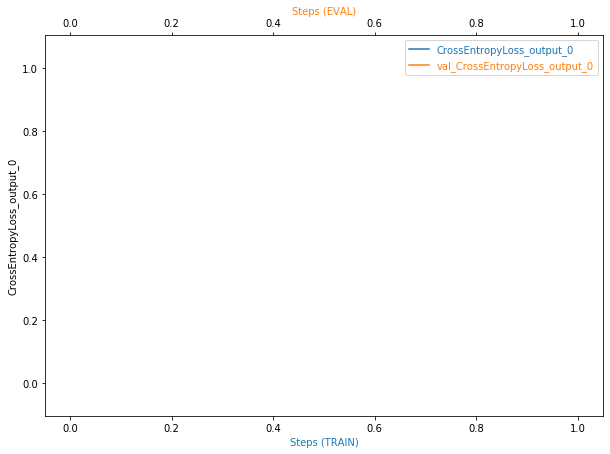

In [64]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

I am not sure if there is any anomolous behavior in my training, but it would seem loss has decreased. Also, there could be overfitting that could be resolved by early stopping training, there could be problem with loss not decreasing in whihc case, I think, more hyperparameter tuning is required, there could be poor weight initialization which, I think, could be resolved using a different model sicne we are fine tuning the model by freezing all the layers except for the last layer

In [45]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output


In [46]:
! aws s3 ls {rule_output_path} --recursive

2021-12-20 07:42:47     375252 smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-report.html
2021-12-20 07:42:46     223182 smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2021-12-20 07:42:41        192 smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2021-12-20 07:42:41        200 smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2021-12-20 07:42:41       2035 smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2021-12-20 07:42:41        127 smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIn

In [47]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-015775941522/smdebugger-dogimage-breed-classificatio-2021-12-20-07-15-26-056/rule-output/ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json to ProfilerReport/profiler-outpu

In [48]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [49]:
profiler_report_name

'ProfilerReport'

## Model Deploying

In [53]:
from sagemaker.pytorch import PyTorchPredictor

In [22]:
training_job_name = f'smdebugger-dogimage-breed-classificatio-2021-12-19-13-16-59-023'
estimator = PyTorch.attach(training_job_name)
estimator.entry_point = 'train_model.py'


2021-12-19 13:42:35 Starting - Preparing the instances for training
2021-12-19 13:42:35 Downloading - Downloading input data
2021-12-19 13:42:35 Training - Training image download completed. Training in progress.
2021-12-19 13:42:35 Uploading - Uploading generated training model
2021-12-19 13:42:35 Completed - Training job completed


In [23]:
estimator.entry_point

'train_model.py'

In [99]:
endpoint_name = f'smdebugger-dogimage-breed-classificatio-2021-12-17-06-18-38-081'
predictor = PyTorchPredictor(endpoint_name)

In [50]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.m5.large") # TODO: Add your deployment configuration like instance type and number of instances

------!

In [51]:
# TODO: Run an prediction on the endpoint
import os
import boto3
import io
import numpy as np
# import cv2
from PIL import Image

s3 = boto3.resource('s3')

def image_from_s3(bucket, key):

    bucket = s3.Bucket(bucket)
    image = bucket.Object(key)
    img_data = image.get().get('Body').read()

    return Image.open(io.BytesIO(img_data))

object_key = 'dogImages/test/007.American_foxhound/American_foxhound_00512.jpg'
img = image_from_s3(bucket, object_key)# TODO: Your code to load and preprocess image to send to endpoint for prediction
# open_cv_image = np.array(image) 
# image = cv2.resize(open_cv_image, (224,224))
# display(open_cv_image)
img = img.resize((224, 224), Image.ANTIALIAS)
print(img.size)

(224, 224)


In [79]:
estimator.entry_point="train_model.py"

In [52]:
"solution:  https://sagemaker.readthedocs.io/en/stable/frameworks/pytorch/using_pytorch.html"
response = predictor.predict(img)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (500) from primary with message "Expected 4-dimensional input for 4-dimensional weight [64, 3, 7, 7], but got 3-dimensional input of size [224, 224, 3] instead
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 126, in transform
    result = self._transform_fn(self._model, input_data, content_type, accept)
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_inference/transformer.py", line 216, in _default_transform_fn
    prediction = self._predict_fn(data, model)
  File "/opt/conda/lib/python3.6/site-packages/sagemaker_pytorch_serving_container/default_pytorch_inference_handler.py", line 125, in default_predict_fn
    output = model(input_data)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 889, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 249, in forward
    return self._forward_impl(x)
  File "/opt/conda/lib/python3.6/site-packages/torchvision/models/resnet.py", line 232, in _forward_impl
    x = self.conv1(x)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/module.py", line 889, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/conv.py", line 399, in forward
    return self._conv_forward(input, self.weight, self.bias)
  File "/opt/conda/lib/python3.6/site-packages/torch/nn/modules/conv.py", line 396, in _conv_forward
    self.padding, self.dilation, self.groups)
RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 7, 7], but got 3-dimensional input of size [224, 224, 3] instead
". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/smdebugger-dogimage-breed-classificatio-2021-12-20-07-45-36-672 in account 015775941522 for more information.

In [86]:
print(response)

NameError: name 'response' is not defined

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()